In [1]:
"""
Author: Cameron Ogiugo

The below document was created to analyse the accelaration of a falling phone on various test datasets.
The phone was dropped from a height of 1.5m and fell on a couch approximately 0.6m high from the ground.

In this document I also aimed to creat standard deviations and means which I could use to plan the creation
of the detecting program. I viewed it in a histogram plot created using seaborn.

It reads the data from a csv file created using the Physics Toolbox sensor suite.

Required Files:
Falltest1.csv
Falltest2.csv
Falltest3.csv
"""

'\nAuthor: Cameron Ogiugo\n\nThe below document was created to analyse the accelaration of a falling phone on various test datasets.\nThe phone was dropped from a height of 1.5m and fell on a couch approximately 0.6m high from the ground.\n\nIn this document I also aimed to creat standard deviations and means which I could use to plan the creation\nof the detecting program. I viewed it in a histogram plot created using seaborn.\n\nIt reads the data from a csv file created using the Physics Toolbox sensor suite.\n\nRequired Files:\nFalltest1.csv\nFalltest2.csv\nFalltest3.csv\n'

In [5]:
# import all modules necessary
import numpy as np 
import seaborn as sns
from numpy.random import normal
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
def createav(x):  #Create function
    i = 0         #Set counter = 0
    average = []        #Create empty list to put averages in
    while i < len(x):   
        i = i + 100
        average.append(((np.average(x[i:i+100]))))   #Iterate through every 100 values and average them, storing in a single value and adding to list
    return(average)

In [8]:
def histplot(x, y, z):    #Create function to plot histograms
    fig = plt.figure(figsize=(10,6))  
    
    mean = np.mean(x)   #Create mean
    std = np.std(x)     #Create standard deviation
    
    norm = normal(loc=mean, scale=std, size=1000)   #Create norm using scipy
    plt1 = sns.histplot(norm, kde=True, color=y)    #Create seaborn plot
    fig = plt1.get_figure()

    plt.xlabel('Accelaration $m/s^2$', fontsize=12) #Label various aspects of plot
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Gaussian Distribution of Phone {z}', fontsize=13, weight='bold')  #Use f string to enclose detail in label
    fig.savefig(f'gaussiandist{z}.png')  #Save as svg

In [11]:
def plot_phone(x, y, z, co):
    time = createav(x[~np.isnan(x)])  #Create average
    totalacc = createav(y[~np.isnan(y)])   #Create total accelaration
    
    time = (time[:4])
    totalacc = (totalacc[:4])

    fig = plt.figure(figsize=(10,8))

    plt.plot(time, totalacc, color=co , linewidth=3)
    plt.xlabel('Time (s)', fontsize=15)
    plt.ylabel('Average Acceleration ($m/s^2$)', fontsize=15)
    plt.title(f'Accelaration of a Falling Phone {z}', fontsize=15, weight='bold')

    fig.savefig(f'phone{z}.png')

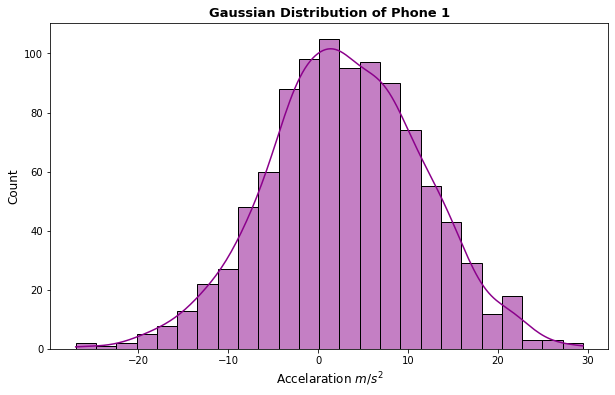

In [9]:
data = pd.read_csv('Falltest1.csv') # We read the data using pandas
time1 = (data['time'])
atotal1 = (data['atotal'])

histplot(atotal1, 'darkmagenta', 1) #use function to plot histogram and change colour

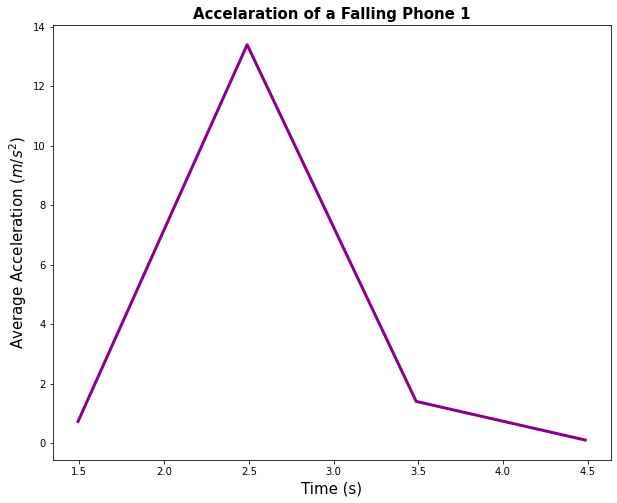

In [12]:
plot_phone(time1, atotal1, 1, 'darkmagenta') #Plot phone accelaration and select colour

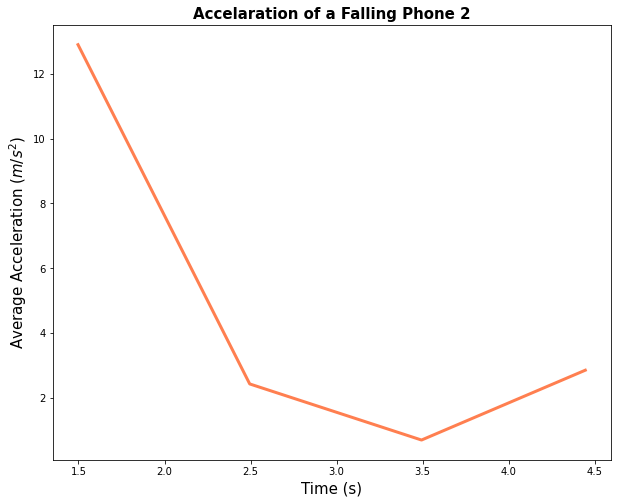

In [13]:
data = pd.read_csv('Falltest2.csv') # We read the data using pandas
time2 = (data['time'])
atotal2 = (data['atotal'])

plot_phone(time2, atotal2, 2, 'coral')

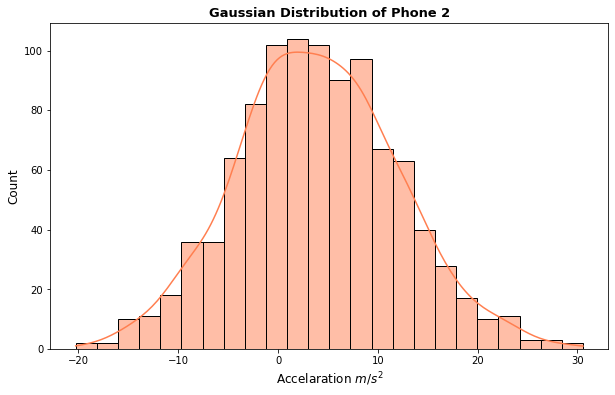

In [14]:
histplot(atotal2, 'coral', 2)

In [15]:
data3 = pd.read_csv('Falltest3.csv') # We read the data using pandas
time3 = (data3['time'])
atotal3 = (data3['atotal'])

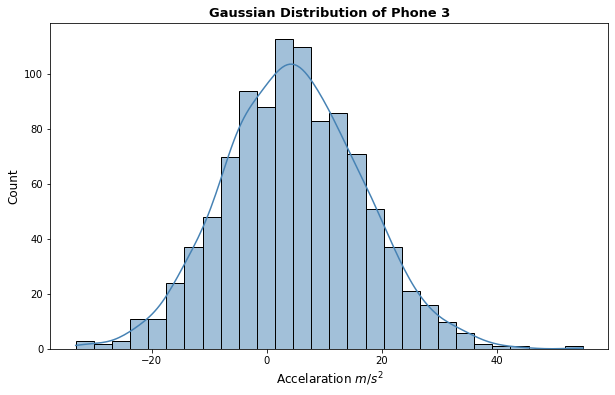

In [16]:
histplot(atotal3, 'steelblue', 3)

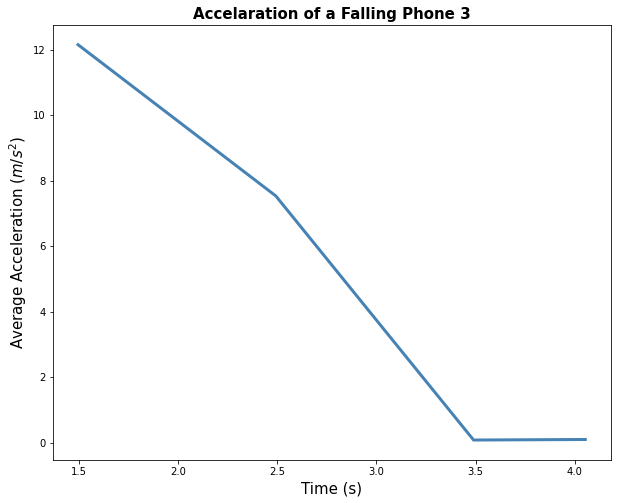

In [17]:
plot_phone(time3, atotal3, 3, 'steelblue')